# Project 3: Classification with Logistic Regression and SVM

Before we start, please put your name and CUID in following format

: Firstname LASTNAME, #00000000   //   e.g. Nianyi LI, #12345678

**Your Answer:**   
Parampreet Singh, C19377466

# General Rules of the Project Submission

Python 3 and [Matplotlib](https://matplotlib.org/) will be used throughout the semseter, so it is important to be familiar with them. It is strongly suggested to go through [Stanford CS231n](http://cs231n.github.io/python-numpy-tutorial/) and [CS228](https://github.com/kuleshov/cs228-material/blob/master/tutorials/python/cs228-python-tutorial.ipynb) for more detailed Python and numpy tutorials if you haven't had used Python before. 

In some cells and files you will see code blocks that look like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

You should replace the `pass` statement with your own code and leave the blocks intact, like this:

```python
##############################################################################
#                    TODO: Write the equation for a line                     #
##############################################################################
y = m * x + b
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################
```

When completing the notebook, please adhere to the following rules:
- Do not write or modify any code outside of code blocks
- Follow the instruction of the project description carefully
- Run all cells before submitting. <span style="color:red">**You will only get credit for code that has been run!**.</span>

The last point is extremely important and bears repeating:

### We will not re-run your notebook -- <span style="color:red">you will only get credit for cells that have been run</span>

### File name
Your Python program should be named **yourlastname_yourfirstname_P3.ipynb**, then zip it and upload to Canvas

# Project Description

For this project we will apply both **Logistic Regression** and **SVM** to predict whether capacitors from a fabrication plant pass quality control based (QC) on two different tests. To train your system and determine its reliability you have a set of 118 examples. The plot of these examples is show below where a red x is a capacitor that failed QC and the green circles represent capacitors that passed QC.

<div>
<img src="https://nianyil.people.clemson.edu/CPSC_4430/P3_new.png" width="500"/>
</div>


## Data File

Two text files with the data is available on Canvas: a training set of 85 examples and a test set of 33 examples. Both are formatted as
- First line: **m** and **n**, tab separated
- Each line after that has two real numbers representing the results of the two tests, followed by a *1.0* if the capacitor *passed* QC and a *0.0* if it *failed* QC—tab separated.

You need to write a code to read data from the file. You **can** use packages, such as **panda**, to load the data.


In [42]:
##############################################################################
#         TODO: Write the code for reading data from file                    #
##############################################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


train_data = pd.read_csv("P3train.txt", index_col = False, sep= "\t")
train_data.columns = ['x1', 'x2', 'y']

test_data = pd.read_csv("P3test.txt", index_col = False, sep= "\t")
test_data.columns = ['x1', 'x2', 'y']

# For SVM -
xtrain = train_data.drop('y', axis=1).copy()
xtest = test_data.drop('y', axis=1).copy()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [43]:
# Standardization

# Standardizing Test 1 data gives better accuracy

# scaled x = (x(i) - µ) / σ; where, µ --> Mean & σ --> Standard Deviation

for clm in train_data.drop(['x2','y'], axis = 1):
    train_data[clm] = (train_data[clm] - train_data[clm].mean())/(train_data[clm].std())

for clm in test_data.drop(['x2','y'], axis = 1):
    test_data[clm] = (test_data[clm] - test_data[clm].mean())/(test_data[clm].std())


In [44]:
train_data

,x1,x2,y
0,0.211996,-0.513890,1
1,0.551538,0.619150,0
2,0.223704,0.575290,1
3,1.617016,0.275580,0
4,1.148669,-0.740500,0
...,...,...,...
80,-1.263250,0.005117,1
81,1.229790,-0.030612,0
82,-0.150960,0.816520,1
83,-0.385135,0.801900,1


In [45]:
test_data

,x1,x2,y
0,0.443773,-0.579680,0
1,0.963945,0.728800,0
2,-0.472207,-0.396930,1
3,1.427599,-0.367690,0
4,-0.449592,0.991960,0
5,-0.540073,-0.367690,0
6,-0.709688,-0.214180,1
7,0.047965,-0.579680,0
8,0.771715,-0.594300,0
9,1.642465,0.085526,0


Your assignment is to use what you have learned from the class slides and homework to create (**from scratch in Python**, not by using Logistic Regression library function!) a **Logistic Regression** and **SVM** binary classifier to predict whether each capacitor in the test set will pass QC. 

## Logistic Regression

You are free to use any model variation and any testing or training approach we have discussed for logistic regression. In particular, since this data is not linear, I assume you will want to add new features based on power of the original two features to create a good decision boundary. $w_0 + w_1x_1 + w_2x_2$ is not going to work!
One choice might be
- $\textbf{w}^T \textbf{x} = w_0 + w_1x_1 + w_2x_2 + w_3x_3 + w_4x_4 + w_5x_5 +w_6x_6 + w_7x_7 + w_8x_8$    where the new features are created as follows:

| New Features |From Original Features |
| --- | --- |
|$x_1$	| $x_1$|
|$x_2$	| $x_1^2$|
|$x_3$	| $x_2$||
|$x_4$	| $x_1x_2$|
|$x_5$	| $x_1x_2^2$|
|$x_6$	| $x_2^2$|
|$x_7$	| $x_1^2x_2$|
|$x_8$	| $x_1^2x_2^2$|

Note that it is easy to create a small Python program that reads in your  original features, uses a nested loop to create the new features and then writes them to a file:

```python
thePower = 2
for j in range(thePower+1): 
    for i in range(thePower+1):
        temp = (x1**i)*(x2**j)
        if (temp != 1):
            fout1.write(str(temp)+"\t") fout1.write(str(y)+"\n")
```

With a few additions to the code, you can make a program to create combinations of any powers of $x_1$ and $x_2$!

In [46]:
##############################################################################
#           TODO: Define the Logistic regression models                      #
##############################################################################

# Polynomial_features function returns a dataframe with new constructed polynomial features as columns

def Polynomial_features(X, thePower):
    poly_list = []
    column = []
    k=0
    for j in range(thePower+1): 
        for i in range(thePower+1):
            temp = (X.iloc[:,0]**i)*(X.iloc[:,1]**j)
            poly_list.append(temp)
            column.append(f'x{k}')
            k+=1
    poly_list_arr = np.array(poly_list)
    return pd.DataFrame(poly_list_arr.T, columns = column)

poly_xtrain_df = Polynomial_features(train_data.drop('y', axis = 1), 2)
poly_xtest_df = Polynomial_features(test_data.drop('y', axis = 1), 2)
ytrain = train_data['y'].copy()
ytest = test_data['y'].copy()

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

## Optimization using Gradient Decent

Once you have defined the logistic regression model, you need to find the weights using the Gradient Decent algorithm. You need to implement the Vanilla Gradient Decent from scratch in Python.

You need to specify the hyperparameters of GD, and plot the training loss curve (**J-curve**). The loss function should be the binary cross-entropy loss function that we introduced.

In [47]:
##############################################################################
#           TODO: Implement the Gradient Decent Algorithm                    #
##############################################################################
# Define the hyperparameters:
# Numbers of epoch (epoch_num), learning rate (lr), and the initial weights(w)
epoch_num = 10000
lr = 0.1
w = np.zeros([9,1]).reshape(-1,1)
J = 0

# Define Y predictions
def Y_Predictions(X, w):
    hW = np.dot(X, w)
    return 1/(1+np.exp(-hW))

# Define the loss:
def cross_entropy_loss(y_pred,y):
    J = - np.mean((y.ravel()*np.log(y_pred.ravel())) + ((1-y.ravel())*np.log(1-y_pred.ravel())))
    return J

# Calculate the gradient function:
def gradient_func(y_pred, y, X):
    gradient_value = np.dot((y_pred.ravel() - y.ravel()).T, X)/len(y)
    return gradient_value.reshape(-1,1)

# Implement the Gradient decent algorithm using for loop
def Vanilla_GD(epoch_num,lr,w, X, y):
    J_list = []
    J_list.append(cross_entropy_loss(Y_Predictions(X, w), y))
    for i in range(epoch_num):
        dw = gradient_func(Y_Predictions(X, w), y, X)
        w -= lr * dw
        J_list.append(cross_entropy_loss(Y_Predictions(X, w), y))
    return J_list, w  

J_final, w_final = Vanilla_GD(epoch_num,lr,w, poly_xtrain_df, ytrain)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Next, print out the final weights and plot the **J-curve/Loss curve** of training. 

FINAL WEIGHTS -


,Weights
w0,4.117868
w1,0.705011
w2,-2.337839
w3,2.881545
w4,-4.180455
w5,0.307527
w6,-8.370199
w7,1.712545
w8,-1.807243


Text(0, 0.5, 'Final Cost (J)')

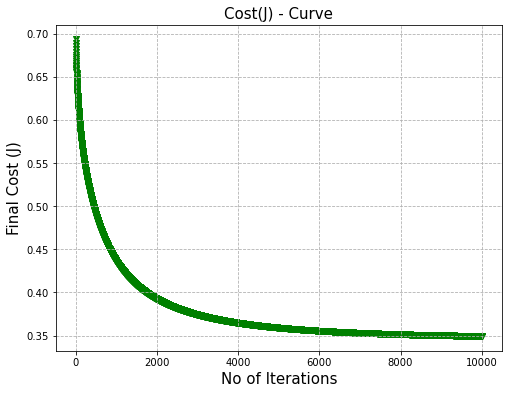

In [48]:
##############################################################################
#                     TODO: Plot the J curve                                 #
##############################################################################
# Print out the final weights
w_final_df = pd.DataFrame(w_final, index= [f'w{i}' for i in range(9)], columns = ['Weights'])
print('\033[1m' + 'FINAL WEIGHTS -' + '\033[0m')
display(w_final_df)
# Plot the J curve w.r.t. the iteration numbers
plt.figure(figsize=(8, 6))
plt.scatter(range(epoch_num+1), J_final, marker='v', color='green')
plt.grid(True, linestyle='--')
plt.title("Cost(J) - Curve", fontsize= 15)
plt.xlabel('No of Iterations', fontsize= 15)
plt.ylabel('Final Cost (J)', fontsize= 15)
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss how you can ensure that the model is well trained.

**Your Answer:**  

For a well trained model, ensure the following -

Cost Function - Cost Function approaches a minimum and stabilizes.

Learning rate - Select an appropriate learning rate that ensures that the cost function decreases steadily.

Check for overfitting and underfitting - overfitting may result in a lower final cost (J) but it will decrease the model performance on test data. Underfitting will result in poor model performance on test data.

As our model passes al the above stated requirements, our self-implemented polynomial logistic regression model is well-trained and performs well on both the training and test data.






## Model Evaluation

Evaluate the performance on testing set:
- Print out the confusion matrix
- Calculate and print out the *accuracy*, *precision*, *recall*, and *F1* value of your model

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>


In [49]:
##############################################################################
#                           TODO: Model Evaluation                           #
##############################################################################
from tabulate import tabulate
# confusion_matrix = [[TN, FP], 
#                      FN, TP]]
confusion_matrix = np.array([[0, 0], [0, 0]])

# Made a y_prediction column under test_data dataframe predicting the class of test data
test_data['y_prediction'] = [1 if i > 0.5 else 0 for i in Y_Predictions(poly_xtest_df, w_final)]

# bool_result column is true when prediction is true i.e. true for True Positivies and True Negatives
test_data['bool_result'] = test_data['y_prediction'] == test_data['y']

# Classifing predicted resutls for each capacitor under the 4 heads of confusion matrix
for idx, row in test_data.iterrows():
    if row['bool_result']:
        if row['y'] == 0:
            confusion_matrix[0][0] += 1
        else:
            confusion_matrix[1][1] += 1
    else: 
        if row['y'] == 0:
            confusion_matrix[0][1] += 1
        else:
            confusion_matrix[1][0] += 1

##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

In [50]:
# Printing Evaluation Metrics

accuracy = (confusion_matrix[0][0] + confusion_matrix[1][1]) * 100 / np.sum(confusion_matrix)
precision = confusion_matrix[1][1] * 100 /(confusion_matrix[0][1] + confusion_matrix[1][1])
recall = confusion_matrix[1][1] * 100 /(confusion_matrix[1][0] + confusion_matrix[1][1])
f1 = 0.02 * (precision * recall / (precision + recall))

print('\033[1m' + 'CONFUSION MATRIX -\n' + '\033[0m')
print(tabulate(confusion_matrix, headers = ['y_prediction (N)', 'y_prediction (T)'], showindex = ['y (N)', 'y (T)']) + '\n')
print('\033[1m' + 'EVALUATION METRICS -' + '\033[0m')
print(f'Accuracy  --> {round(accuracy, 2)} % \nPrecision --> {precision} % \nRecall    --> {recall} %\nF1 Score  --> {f1} ')

CONFUSION MATRIX -

         y_prediction (N)    y_prediction (T)
-----  ------------------  ------------------
y (N)                  15                   2
y (T)                   2                  14

EVALUATION METRICS -
Accuracy  --> 87.88 % 
Precision --> 87.5 % 
Recall    --> 87.5 %
F1 Score  --> 0.875 


## Support Vector Machine (SVM)

In this part, you need to use the previous training and testing data file. 

You are **allowed** to use the svm functions in the **Scikit-learn** library and don’t need to implement the algorithm from scratch.

- You need to try at least **three** different kernel functions of SVM, and pick the **best** model.
- You need to print out the final weights got from your best SVM model.

**Note that:**
- For **undergrads** *(CPSC 4430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**70%**</span>
- For **graduate-level** *(CPSC 6430)* the final accuracy of both algorithms on your test set should be higher than  <span style="color:red">**85%**</span>

In [51]:
##############################################################################
#                      TODO: Classfication using SVM                         #
##############################################################################
# Pick the best model
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")


SVM = {'linear': None, 'poly': None, 'rbf': None, 'sigmoid': None}
acc = {'linear': None, 'poly': None, 'rbf': None, 'sigmoid': None}

# Define the hyperparameter grid
c = np.linspace(0,20,100)
param_grid = dict(C = c, gamma = ['auto'])

for model in SVM.keys():
    SVM[model] = svm.SVC(kernel=model)
    
    # Create a GridSearchCV object for this model
    grid = GridSearchCV(SVM[model], param_grid=param_grid, cv=5)
    grid.fit(xtrain, ytrain)
    
    # Set the model with the best hyperparameters
    SVM[model] = grid.best_estimator_
    acc[model] = SVM[model].score(xtest, ytest)

best_model = max(acc, key=acc.get)

# Print the accuracy of each model
for model in acc.keys():
    print('Accuracy of SVM with {0} kernel--> {1:3.2f}%'.format(model, acc[model]*100))

# Print the best model and its accuracy
print('\nBest model: SVM with {} kernel'.format(best_model))
print('Accuracy of best model--> {0:3.2f} %'.format(acc[best_model]*100))

# Print out the final weights
print("Final weights:\n", SVM[best_model].support_vectors_)
pass
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Accuracy of SVM with linear kernel--> 51.52%
Accuracy of SVM with poly kernel--> 66.67%
Accuracy of SVM with rbf kernel--> 87.88%
Accuracy of SVM with sigmoid kernel--> 51.52%

Best model: SVM with rbf kernel
Accuracy of best model--> 87.88 %
Final weights:
 [[ 0.29896    0.61915  ]
 [ 0.82316    0.27558  ]
 [ 0.59274   -0.7405   ]
 [-0.13306   -0.4481   ]
 [-0.4038     0.70687  ]
 [ 0.28744   -0.76974  ]
 [-0.72062    0.53874  ]
 [ 0.60426    0.59722  ]
 [-0.28859   -0.060673 ]
 [ 0.22408    0.77997  ]
 [ 0.86348   -0.082602 ]
 [-0.54781    0.70687  ]
 [ 0.89804   -0.20687  ]
 [-0.38076    0.91886  ]
 [-0.46717   -0.13377  ]
 [-0.046659  -0.57968  ]
 [ 0.46601   -0.41886  ]
 [-0.61118   -0.067982 ]
 [-0.75518    0.2902   ]
 [ 0.10311    0.77997  ]
 [ 0.39689    0.82383  ]
 [ 0.63265   -0.030612 ]
 [-0.0063364  0.99927  ]
 [ 0.13191   -0.51389  ]
 [-0.29435    0.77997  ]
 [-0.60541    0.59722  ]
 [ 0.73675   -0.18494  ]
 [ 0.38537   -0.56506  ]
 [ 0.54666    0.48757  ]
 [-0.62846    0.

## Visualize Decision Boundary and Model Comparision

You need to plot the decision boundary of Logistic Regression and SVM that you previously trained separately. 

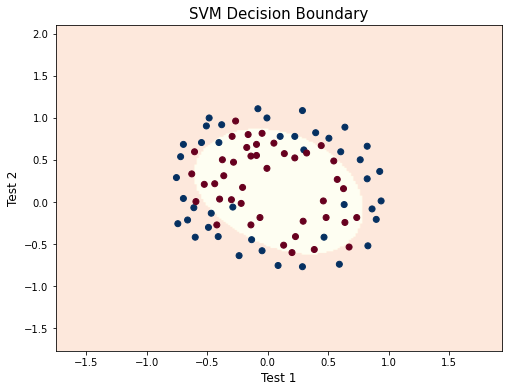

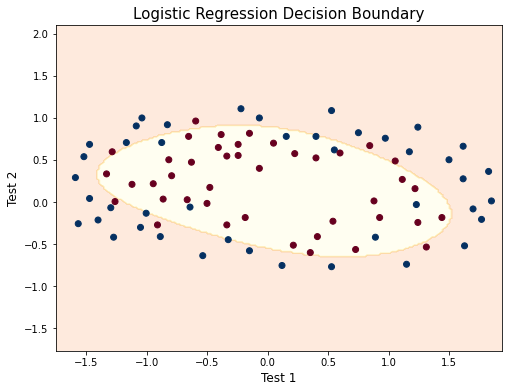

In [52]:
##############################################################################
#                   TODO: Plot the Decision Boundary                         #
##############################################################################
# SVM DECISION BOUNDARY

plt.figure(figsize=(8, 6))
x_min, x_max = xtrain['x1'].min() - 1, xtrain['x1'].max() + 1
y_min, y_max = xtrain['x2'].min() - 1, xtrain['x2'].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

# evaluate decision function in a grid
Z = SVM[best_model].predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# visualize decision boundary
plt.imshow(Z,vmin=-1, vmax=3, extent=(xx.min(), xx.max(), yy.min(), yy.max()), origin='lower', cmap=plt.cm.RdYlBu, alpha=0.2)

# visualize training data points
plt.scatter(xtrain['x1'], xtrain['x2'], c=ytrain, cmap=plt.cm.RdBu_r)
plt.xlabel('Test 1', fontsize = 12)
plt.ylabel('Test 2', fontsize = 12)
plt.title('SVM Decision Boundary', fontsize = 15)
plt.axis("tight")
plt.show()

# LOGISTIC REGRESSION DECISION BOUNDARY

plt.figure(figsize=(8, 6))

# Use the model to predict the probability of each point belonging to the positive class

x_grid = Polynomial_features(pd.DataFrame(np.c_[xx.ravel(), yy.ravel()]), 2)
Z = Y_Predictions(x_grid, w_final)
Z_binary = (Z > 0.5).astype(int)
Z = Z.reshape(xx.shape)

# Threshold the predicted probabilities to obtain a binary classification
Z_binary = (Z > 0.5).astype(int)

# visualize decision boundary
plt.contourf(xx, yy, Z_binary, cmap=plt.cm.RdYlBu, alpha = 0.2, color = 'k', vmin=-1, vmax=3)
plt.scatter(train_data['x1'], train_data['x2'], c=ytrain, cmap=plt.cm.RdBu_r)
plt.xlabel('Test 1', fontsize = 12)
plt.ylabel('Test 2', fontsize = 12)
plt.title('Logistic Regression Decision Boundary', fontsize = 15)
plt.axis("tight")
plt.show()
##############################################################################
#                              END OF YOUR CODE                              #
##############################################################################

Based on your data and plot, you should then briefly discuss which one has better performance and why.

**Your Answer:**  

Both logistic regression and SVM models have the same accuracy of 87.88%, but other factors need to be considered to determine which model has better performance. These factors include model complexity, interpretability, computation time, robustness to outliers, and data distribution. 

Logistic regression may be better if interpretability and computation time are important, while SVM may be better for robustness to outliers and non-linearity. Overall, it is difficult to determine which model has better performance without additional information about the problem and the data.

Also, in our case, we scaled the data to get higher accuracy for logistic regression, whereas, SVM performed equally good without scaling the data.